In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import plotly.offline as py
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)

datain = pd.read_csv('PCA_Datain.txt', sep='\t', engine='python')
dataout = pd.read_csv('PCA_Dataout.txt', sep='\t', engine='python')
DataHora = pd.read_csv('PCA_Datahora.txt', sep='\t', engine='python')

# DataHora = pd.DataFrame(data1, columns=['Hora'])

# DataHora['Hora'] = pd.to_datetime(DataHora['Hora'].apply(read_date), errors='coerce')


In [2]:
datainf = datain.copy()
dataoutf = dataout.copy()
DataHora_f = DataHora.copy()

indexval = datain[((datain['UGD6_Running']<6) | (datain['UGD6_Running']>13))\
                | ((datain['UGD7_Running']<6) | (datain['UGD7_Running']>13))\
                | ((datain['UGD8_Running']<6) | (datain['UGD8_Running']>13))\
                | ((datain['UGD9_Running']<6) | (datain['UGD9_Running']>13))\
                | ((datain['UGD10_Running']<6) | (datain['UGD10_Running']>13))].index

datainf.drop(indexval,inplace=True)
dataoutf.drop(indexval,inplace=True)
DataHora_f.drop(indexval,inplace=True)

datainf = datainf.reset_index()
dataoutf = dataoutf.reset_index()
DataHora_f = DataHora_f.reset_index()

datainf.drop('index',axis=1,inplace=True)
dataoutf.drop('index',axis=1,inplace=True)
DataHora_f.drop('index',axis=1,inplace=True)

In [3]:
data_in = [datainf.TentHT, datainf.Tamb, datainf.Power6, datainf.Power7, datainf.Power8, datainf.Power9, datainf.Power10]
entrada = pd.concat(data_in, axis=1)

data_out = [dataoutf.TsaidaHT, dataoutf.NumVentOn]
saida = pd.concat(data_out, axis=1)

pca_matriz = pd.concat([entrada], axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

normalizado = StandardScaler().fit_transform(pca_matriz)

pca = PCA()
principalComponents = pca.fit_transform(normalizado)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Componente principal 1', 'Componente principal 2','Componente principal 3', 'Componente principal 4', 'Componente principal 5', 'Componente principal 6', 'Componente principal 7'])

explained_variance = pca.explained_variance_ratio_
pca_components = pca.components_

print(pca_components)
print(pca.explained_variance_)


[[-0.3699065  -0.10673866 -0.3918253  -0.27206635 -0.39178467 -0.47479805
  -0.49527816]
 [-0.50387753 -0.73907954  0.34933607 -0.17003971  0.1042324   0.13253356
   0.14314376]
 [ 0.13090799  0.13261317 -0.16234034 -0.90016056  0.30690028  0.1482269
   0.11168899]
 [ 0.20196602  0.06182783  0.4130579  -0.26895439 -0.81522185  0.16557147
   0.14294463]
 [ 0.14565684 -0.37025492 -0.71918129  0.10867793 -0.25986024  0.34648612
   0.35367043]
 [-0.53273112  0.38053963 -0.07210008  0.05096327 -0.06288339  0.6964855
  -0.2730295 ]
 [-0.49631752  0.37290782 -0.07103432  0.00572297 -0.07337754 -0.32011226
   0.70828944]]
[2.14380477 1.26324647 0.9113759  0.78191139 0.68257491 0.64399424
 0.57310163]


In [5]:
#Calcular a matriz de covariância

cov_m = np.cov(normalizado.T)

print(cov_m)

eig_vals, eig_vecs = np.linalg.eig(cov_m)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

[[ 1.00000133  0.30723465  0.10766067  0.16580933  0.16882722  0.22254305
   0.26491029]
 [ 0.30723465  1.00000133 -0.08723948  0.08546238  0.02459773  0.02553275
  -0.00482307]
 [ 0.10766067 -0.08723948  1.00000133  0.14386409  0.19986369  0.29946457
   0.31907175]
 [ 0.16580933  0.08546238  0.14386409  1.00000133  0.10420439  0.13954977
   0.15603578]
 [ 0.16882722  0.02459773  0.19986369  0.10420439  1.00000133  0.27595597
   0.29349835]
 [ 0.22254305  0.02553275  0.29946457  0.13954977  0.27595597  1.00000133
   0.39293128]
 [ 0.26491029 -0.00482307  0.31907175  0.15603578  0.29349835  0.39293128
   1.00000133]]
Eigenvectors 
[[ 0.3699065   0.50387753  0.13090799 -0.20196602 -0.49631752  0.53273112
   0.14565684]
 [ 0.10673866  0.73907954  0.13261317 -0.06182783  0.37290782 -0.38053963
  -0.37025492]
 [ 0.3918253  -0.34933607 -0.16234034 -0.4130579  -0.07103432  0.07210008
  -0.71918129]
 [ 0.27206635  0.17003971 -0.90016056  0.26895439  0.00572297 -0.05096327
   0.10867793]
 [ 0.3

In [6]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,9)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,9)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='selecting-principal-components')

In [7]:
# p1 = go.Scatter(
#     x = DataHora['Hora'],
#     y = entrada['TentHT'],
#     name = 'TentHT'
# )

# p2 = go.Scatter(
#     x = DataHora['Hora'],
#     y = entrada['NumVentOn'],
#     name = 'NumVentOn'    
# )

# p3 = go.Scatter(
#     x = DataHora['Hora'],
#     y = entrada['Tamb'],
#     name = 'Tamb'
# )

# p4 = go.Scatter(
#     x = DataHora['Hora'],
#     y = saida['TsaidaHT'],
#     name = 'TsaidaHT'
# )

# trend = go.Figure()
# trend.add_trace(p1)
# #trend.add_trace(p2)
# #trend.add_trace(p3)
# #trend.add_trace(p4)
# trend.show()

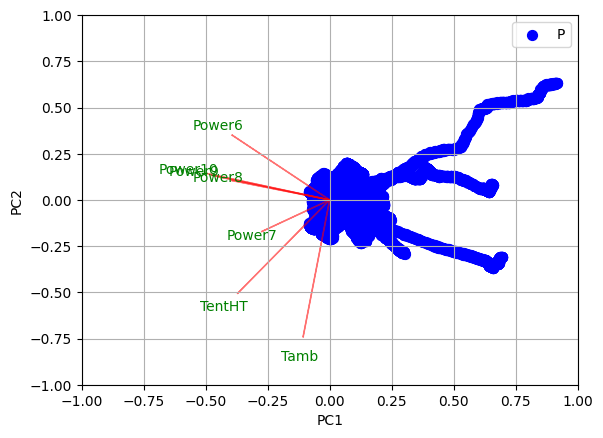

In [8]:
def myplot(score,coeff,labels):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley,color = 'b', s = 50)
    plt.legend('PCA')
    #plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]),list(pca_matriz))
plt.show()

In [9]:
# Normalizando PCA
comp1 = principalComponents[:,0]
comp2 = principalComponents[:,1]
comp3 = principalComponents[:,2]
comp4 = principalComponents[:,3]

n = np.transpose(pca.components_[0:3, :]).shape[0]
scale1 = 1.0/(comp1.max() - comp1.min())
scale2 = 1.0/(comp2.max() - comp2.min())
scale3 = 1.0/(comp3.max() - comp3.min())
scale4 = 1.0/(comp4.max() - comp4.min())

comp1n = scale1*comp1
comp2n = scale2*comp2
comp3n = scale3*comp3
comp4n = scale4*comp4

In [10]:
# Parte - Autorules fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Vent = ctrl.Antecedent(np.arange(0, 56,1), 'Vent')
Tout = ctrl.Consequent(np.arange(20, 100, 0.01), 'Tout')
PCA1 = ctrl.Antecedent(np.arange(-1, 1, 0.001), 'PCA1')
PCA2 = ctrl.Antecedent(np.arange(-1, 1, 0.001), 'PCA2')
PCA3 = ctrl.Antecedent(np.arange(-1, 1, 0.001), 'PCA3')
PCA4 = ctrl.Antecedent(np.arange(-1, 1, 0.001), 'PCA4')


In [11]:
i=0
tempmf = 100
pcamf =  60
ventmf = 56
namestemp = []
namespca = []
namesvent = []
for i in range(tempmf):
    temp = 'temp'+str(i)
    namestemp.append(temp)
for i in range(pcamf):
    temp = 'comp'+str(i)
    namespca.append(temp)
for i in range(ventmf):
    temp = 'ventnum'+str(i)
    namesvent.append(temp)

namestemppd = pd.DataFrame(namestemp,columns=['name'])
namespcapd = pd.DataFrame(namespca,columns=['name'])
namesventpd = pd.DataFrame(namesvent,columns=['name'])

# Auto-membership function population is possible with .automf(3, 5, or 7)
Vent.automf(names=namesvent)
Tout.automf(names=namestemp)
PCA1.automf(names=namespca)
PCA2.automf(names=namespca)
PCA3.automf(names=namespca)
PCA4.automf(names=namespca)


In [12]:
stp_ini = 0
stp_fim = 21600

per1 = stp_ini
per2 = stp_fim

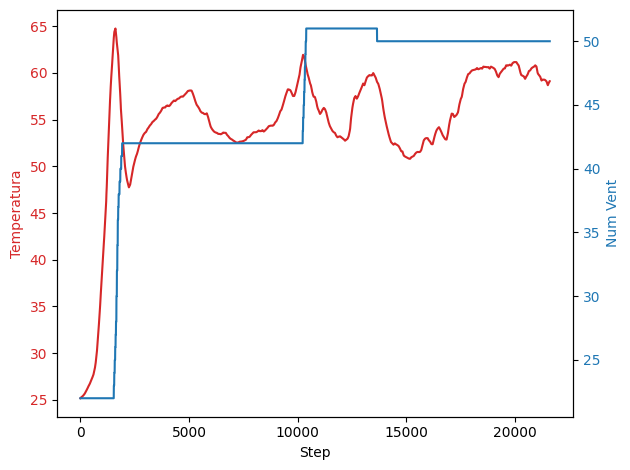

In [13]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Step')
ax1.set_ylabel('Temperatura', color=color)
ax1.plot(dataoutf.TsaidaHT[per1:per2], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Num Vent', color=color)  # we already handled the x-label with ax1
ax2.plot(dataoutf.NumVentOn[per1:per2], color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim([20,43])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#print(DataHora_f[per1:per2])
plt.show()

In [14]:
# Auto rules PCA
x1 = []
x2 = []
x3 = []
x4 = []
n = 0
m = 0
condition1 = []
condition2 = []
condition3 = []
condition4 = []

for n in range(len(namespca)):
    x1.append(fuzz.interp_membership(np.arange(-1, 1, 0.001), PCA1[namespcapd.name.loc[n]].mf, comp1n[stp_ini:stp_fim]))
    x2.append(fuzz.interp_membership(np.arange(-1, 1, 0.001), PCA2[namespcapd.name.loc[n]].mf, comp2n[stp_ini:stp_fim]))
    x3.append(fuzz.interp_membership(np.arange(-1, 1, 0.001), PCA3[namespcapd.name.loc[n]].mf, comp3n[stp_ini:stp_fim]))
    x4.append(fuzz.interp_membership(np.arange(-1, 1, 0.001), PCA4[namespcapd.name.loc[n]].mf, comp4n[stp_ini:stp_fim]))
        
x1 = np.transpose(x1)
x1_conv = pd.DataFrame(x1)
x2 = np.transpose(x2)
x2_conv = pd.DataFrame(x2)
x3 = np.transpose(x3)
x3_conv = pd.DataFrame(x3)
x4 = np.transpose(x4)
x4_conv = pd.DataFrame(x4)

i=0
for i in range(pcamf):
    condition1.append([x1_conv.idxmax(axis=1) == i])
    condition2.append([x2_conv.idxmax(axis=1) == i])
    condition3.append([x3_conv.idxmax(axis=1) == i])
    condition4.append([x4_conv.idxmax(axis=1) == i])

choicelist = namespca

x1_rules = np.select(condition1, choicelist)
x2_rules = np.select(condition2, choicelist)
x3_rules = np.select(condition3, choicelist)
x4_rules = np.select(condition4, choicelist)

In [15]:
#Auto rules para Tout
x6 = []
n = 0
m = 0
condition6 = []

for n in range(len(namestemp)):
    x6.append(fuzz.interp_membership(np.arange(20, 100, 0.01), Tout[namestemppd.name.loc[n]].mf, dataoutf.TsaidaHT[stp_ini:stp_fim]))
    
x6 = np.transpose(x6)
Tout_conv = pd.DataFrame(x6)

i=0
for i in range(tempmf):
    condition6.append([Tout_conv.idxmax(axis=1) == i])
choicelist6 = namestemp

Tout_rules = np.select(condition6, choicelist6)

In [16]:
#Auto rules para Vent
x5 = []
n = 0
m = 0
condition5 = []

for n in range(len(namesvent)):
    x5.append(fuzz.interp_membership(np.arange(0,56,1), Vent[namesventpd.name.loc[n]].mf, dataoutf.NumVentOn[stp_ini:stp_fim]))
    
x5 = np.transpose(x5)
Vent_conv = pd.DataFrame(x5)

i=0
for i in range(ventmf):
    condition5.append([Vent_conv.idxmax(axis=1) == i])
choicelist5 = namesvent

Vent_rules = np.select(condition5, choicelist5)

In [17]:
Rules = np.vstack([x1_rules,x2_rules,x3_rules,x4_rules,Vent_rules,Tout_rules])
Rules = Rules.T

####################################################

AutoRules = pd.DataFrame(Rules, columns=['PCA1','PCA2','PCA3','PCA4','Vent','Tout'])
print('Total de regras extraidas:',len(AutoRules))

AutoRules = AutoRules.drop_duplicates()
print('Total de regras unicas:',len(AutoRules))

AutoRules = AutoRules.reset_index(drop=True)
#print(AutoRules)

Total de regras extraidas: 21600
Total de regras unicas: 754


In [18]:
i=0
rule = []
for i in range(len(AutoRules)):
    rule.append(ctrl.Rule(PCA1[AutoRules.PCA1.loc[i]] & PCA2[AutoRules.PCA2.loc[i]] & PCA3[AutoRules.PCA3.loc[i]] & PCA4[AutoRules.PCA4.loc[i]] & Vent[AutoRules.Vent.loc[i]], (Tout[AutoRules.Tout.loc[i]]%1.0)))


In [22]:
newrule = ctrl.Rule(PCA1[AutoRules.PCA1.loc[2]] & PCA2[AutoRules.PCA2.loc[5]] & PCA3[AutoRules.PCA3.loc[3]] & PCA4[AutoRules.PCA4.loc[4]] & Vent[AutoRules.Vent.loc[5]], (Tout[AutoRules.Tout.loc[6]]%1.0))

len(rule)


sim = ctrl.ControlSystem(rule)
sim.addrule(newrule)
simulation = ctrl.ControlSystemSimulation(sim)
sim.view()

In [20]:
sim = ctrl.ControlSystem(rule)

KeyboardInterrupt: 

In [ ]:
simulation = ctrl.ControlSystemSimulation(sim)

In [ ]:
#import dill

# Save the file
#dill.dump(simulation, file = open("simulation_1.pickle", "wb"))

In [ ]:
i

753

In [ ]:
from IPython.display import clear_output
import timeit

step = stp_ini
k = 0
delay = stp_ini
end = stp_fim - stp_ini + 21000
Tout_sim = pd.DataFrame(columns=['val'])
Vent_sim = pd.DataFrame(columns=['val'])

start = timeit.default_timer()

for step in range(end-k):
    clear_output(wait=True)
    simulation.input['PCA1'] = comp1n[step+delay]
    simulation.input['PCA2'] = comp2n[step+delay]
    simulation.input['PCA3'] = comp3n[step+delay]
    simulation.input['PCA4'] = comp4n[step+delay]
    simulation.input['Vent'] = dataoutf.NumVentOn[step+delay]
    simulation.compute()
    Tout_sim = Tout_sim.append({'val':simulation.output['Tout']},ignore_index=True)
    #Vent_sim = Vent_sim.append({'val':simulation.output['Vent']},ignore_index=True)
    
    stop = timeit.default_timer()
    if ((step/(stp_fim-k-1))*100) < 5:
        expected_time = "Calculating..."
    else:
        time_perc = timeit.default_timer()
        expected_time = np.round( ( (time_perc-start)/(step/(end-k-1)) )/60,2)
        
    print("Current progress: ",np.round((step/(end-k-1))*100,2),"%")
    print("Current run time: ",np.round((stop-start)/60,2),"minutes")
    print("Expected run time: ",expected_time,"minutes")


ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.

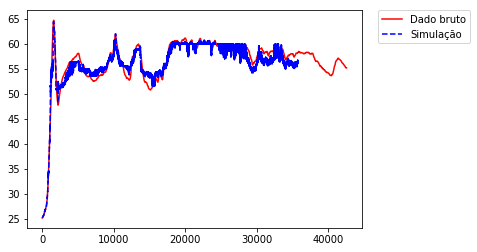

In [ ]:
plt.plot(dataoutf.TsaidaHT[stp_ini:end-k].reset_index(drop=True), 'r', label='Dado bruto')
plt.plot(Tout_sim.val[0:end-k], 'b--', label='Simulação')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [ ]:
new_c1 = []
new_c2 = []
new_c3 = []
new_c4 = []
new_vent = []
new_tout = []
newcondition1 = []
newcondition2 = []
newcondition3 = []
newcondition4 = []
newcondition5 = []
newcondition6 = []

#input
n = 0
for n in range(len(namespca)):
    new_c1.append(fuzz.interp_membership(np.arange(-1, 1, 0.001), PCA1[namespcapd.name.loc[n]].mf, comp1n[step]))
    new_c2.append(fuzz.interp_membership(np.arange(-1, 1, 0.001), PCA2[namespcapd.name.loc[n]].mf, comp2n[step]))
    new_c3.append(fuzz.interp_membership(np.arange(-1, 1, 0.001), PCA3[namespcapd.name.loc[n]].mf, comp3n[step]))
    new_c4.append(fuzz.interp_membership(np.arange(-1, 1, 0.001), PCA4[namespcapd.name.loc[n]].mf, comp4n[step]))

n = 0
for n in range(len(namesvent)):    
    new_vent.append(fuzz.interp_membership(np.arange(0,56,1), Vent[namesventpd.name.loc[n]].mf, dataoutf.NumVentOn[step]))
    
#output
n = 0
for n in range(len(namestemp)):
    new_tout.append(fuzz.interp_membership(np.arange(20, 100, 0.01), Tout[namestemppd.name.loc[n]].mf, dataoutf.TsaidaHT[step]))
    
#new_c1 = np.transpose(new_c1)
new_c1_conv = pd.DataFrame(new_c1)
#new_c2 = np.transpose(new_c2)
new_c2_conv = pd.DataFrame(new_c2)
#new_c3 = np.transpose(new_c3)
new_c3_conv = pd.DataFrame(new_c3)
#new_c4 = np.transpose(new_c4)
new_c4_conv = pd.DataFrame(new_c4)
#new_vent = np.transpose(new_vent)
new_vent_conv = pd.DataFrame(new_vent)
#new_tout = np.transpose(new_tout)
new_tout_conv = pd.DataFrame(new_tout)

i=0
for i in range(pcamf):
    newcondition1.append([new_c1_conv.idxmax(axis=0) == i])
    newcondition2.append([new_c2_conv.idxmax(axis=0) == i])
    newcondition3.append([new_c3_conv.idxmax(axis=0) == i])
    newcondition4.append([new_c4_conv.idxmax(axis=0) == i])

i=0
for i in range(ventmf):
    newcondition5.append([new_vent_conv.idxmax(axis=0) == i])
    
i=0
for i in range(tempmf):
    newcondition6.append([new_tout_conv.idxmax(axis=0) == i])

choicelistpca = namespca
choicelistvent = namesvent
choicelisttout = namestemp

new_c1_rules = np.select(newcondition1, choicelistpca)
new_c2_rules = np.select(newcondition2, choicelistpca)
new_c3_rules = np.select(newcondition3, choicelistpca)
new_c4_rules = np.select(newcondition4, choicelistpca)
new_vent_rules = np.select(newcondition5, choicelistvent)
new_tout_rules = np.select(newcondition6, choicelisttout)

new_rules = np.vstack([new_c1_rules,new_c2_rules,new_c3_rules,new_c4_rules,new_vent_rules,new_tout_rules])
new_rules = new_rules.T

new_rulespd = pd.DataFrame(new_rules,columns=['PCA1','PCA2','PCA3','PCA4','Vent','Tout'])

#Checar se a nova regra está dentro do conjunto de regras fuzzy atual
if pd.merge(new_rulespd,AutoRules, on=['PCA1','PCA2','PCA3','PCA4','Vent','Tout'],how='inner').empty:
    print('Nova regra não encontrada no conjunto atual de regras fuzzy!')
else:
    pd.merge(new_rulespd,AutoRules, on=['PCA1','PCA2','PCA3','PCA4','Vent','Tout'],how='inner')

Nova regra não encontrada no conjunto atual de regras fuzzy!


In [ ]:
pc1v = (fuzz.interp_membership(np.arange(-1, 1, 0.001), PCA1[new_rulespd.PCA1[0]].mf, comp1n[step]))
pc2v = (fuzz.interp_membership(np.arange(-1, 1, 0.001), PCA2[new_rulespd.PCA2[0]].mf, comp2n[step]))
pc3v = (fuzz.interp_membership(np.arange(-1, 1, 0.001), PCA3[new_rulespd.PCA3[0]].mf, comp3n[step]))
pc4v = (fuzz.interp_membership(np.arange(-1, 1, 0.001), PCA4[new_rulespd.PCA4[0]].mf, comp4n[step]))
ventv = (fuzz.interp_membership(np.arange(0,56,1), Vent[new_rulespd.Vent[0]].mf, dataoutf.NumVentOn[step]))
toutv = (fuzz.interp_membership(np.arange(20, 100, 0.01), Tout[new_rulespd.Tout[0]].mf, dataoutf.TsaidaHT[step]))

In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [ ]:
idx_axis = []
#Pca1
x_axis1 = np.arange(-1,1,2/len(PCA1[new_rulespd.PCA1[0]].mf))
y_axis1 = PCA1[new_rulespd.PCA1[0]].mf
idx_axis1 = np.where(y_axis1>0)
idx_axis1 = list(idx_axis1[0])

idx_axis1.insert(0,idx_axis1[0]-1)
idx_axis1.append(idx_axis1[-1]+1)

x_axis1 = np.take(x_axis1,idx_axis1)
y_axis1 = np.take(y_axis1,idx_axis1)

loc1 = find_nearest(y_axis1,pc1v)
locc1 = x_axis1[np.where(y_axis1==loc1)]
defuzz_funn1 = np.where(y_axis1>pc1v,pc1v,y_axis1)

x_axis1 = np.arange(-1,1,2/len(PCA1[new_rulespd.PCA1[0]].mf))
y_axis1 = PCA1[new_rulespd.PCA1[0]].mf
idx_axis1 = np.where(y_axis1>0)
idx_axis1 = list(idx_axis1[0])

idx_axis1.insert(0,idx_axis1[0]-1)
idx_axis1.append(idx_axis1[-1]+1)

x_axis1 = np.take(x_axis1,idx_axis1)
y_axis1 = np.take(y_axis1,idx_axis1)

loc1 = find_nearest(y_axis1,pc1v)
locc1 = x_axis1[np.where(y_axis1==loc1)]
defuzz_funn1 = np.where(y_axis1>pc1v,pc1v,y_axis1)

In [ ]:
#Pca2
x_axis2 = np.arange(-1,1,2/len(PCA2[new_rulespd.PCA2[0]].mf))
y_axis2 = PCA2[new_rulespd.PCA2[0]].mf
idx_axis2 = np.where(y_axis2>0)
idx_axis2 = list(idx_axis2[0])

idx_axis2.insert(0,idx_axis2[0]-1)
idx_axis2.append(idx_axis2[-1]+1)

x_axis2 = np.take(x_axis2,idx_axis2)
y_axis2 = np.take(y_axis2,idx_axis2)

loc2 = find_nearest(y_axis2,pc2v)
locc2 = x_axis2[np.where(y_axis2==loc2)]
defuzz_funn2 = np.where(y_axis2>pc2v,pc2v,y_axis2)

x_axis2 = np.arange(-1,1,2/len(PCA2[new_rulespd.PCA2[0]].mf))
y_axis2 = PCA2[new_rulespd.PCA2[0]].mf
idx_axis2 = np.where(y_axis2>0)
idx_axis2 = list(idx_axis2[0])

idx_axis2.insert(0,idx_axis2[0]-1)
idx_axis2.append(idx_axis2[-1]+1)

x_axis2 = np.take(x_axis2,idx_axis2)
y_axis2 = np.take(y_axis2,idx_axis2)

loc2 = find_nearest(y_axis2,pc2v)
locc2 = x_axis2[np.where(y_axis2==loc2)]
defuzz_funn2 = np.where(y_axis2>pc2v,pc2v,y_axis2)

In [ ]:
#Pca3
x_axis3 = np.arange(-1,1,2/len(PCA3[new_rulespd.PCA3[0]].mf))
y_axis3 = PCA3[new_rulespd.PCA3[0]].mf
idx_axis3 = np.where(y_axis3>0)
idx_axis3 = list(idx_axis3[0])

idx_axis3.insert(0,idx_axis3[0]-1)
idx_axis3.append(idx_axis3[-1]+1)

x_axis3 = np.take(x_axis3,idx_axis3)
y_axis3 = np.take(y_axis3,idx_axis3)

loc3 = find_nearest(y_axis3,pc3v)
locc3 = x_axis3[np.where(y_axis3==loc3)]
defuzz_funn3 = np.where(y_axis3>pc3v,pc3v,y_axis3)

x_axis3 = np.arange(-1,1,2/len(PCA3[new_rulespd.PCA3[0]].mf))
y_axis3 = PCA3[new_rulespd.PCA3[0]].mf
idx_axis3 = np.where(y_axis3>0)
idx_axis3 = list(idx_axis3[0])

idx_axis3.insert(0,idx_axis3[0]-1)
idx_axis3.append(idx_axis3[-1]+1)

x_axis3 = np.take(x_axis3,idx_axis3)
y_axis3 = np.take(y_axis3,idx_axis3)

loc3 = find_nearest(y_axis3,pc3v)
locc3 = x_axis3[np.where(y_axis3==loc3)]
defuzz_funn3 = np.where(y_axis3>pc3v,pc3v,y_axis3)

In [ ]:
#Pca4
x_axis4 = np.arange(-1,1,2/len(PCA4[new_rulespd.PCA4[0]].mf))
y_axis4 = PCA4[new_rulespd.PCA4[0]].mf
idx_axis4 = np.where(y_axis4>0)
idx_axis4 = list(idx_axis4[0])

idx_axis4.insert(0,idx_axis4[0]-1)
idx_axis4.append(idx_axis4[-1]+1)

x_axis4 = np.take(x_axis4,idx_axis4)
y_axis4 = np.take(y_axis4,idx_axis4)

loc4= find_nearest(y_axis4,pc4v)
locc4 = x_axis4[np.where(y_axis4==loc4)]
defuzz_funn4 = np.where(y_axis4>pc4v,pc4v,y_axis4)

x_axis4 = np.arange(-1,1,2/len(PCA4[new_rulespd.PCA4[0]].mf))
y_axis4 = PCA4[new_rulespd.PCA4[0]].mf
idx_axis4 = np.where(y_axis4>0)
idx_axis4 = list(idx_axis4[0])

idx_axis4.insert(0,idx_axis4[0]-1)
idx_axis4.append(idx_axis4[-1]+1)

x_axis4 = np.take(x_axis4,idx_axis4)
y_axis4 = np.take(y_axis4,idx_axis4)

loc4 = find_nearest(y_axis4,pc4v)
locc4 = x_axis4[np.where(y_axis4==loc4)]
defuzz_funn4 = np.where(y_axis4>pc4v,pc4v,y_axis4)

In [ ]:
#Vent
x_axis5 = np.arange(0,56,2/len(Vent[new_rulespd.Vent[0]].mf))
y_axis5 = Vent[new_rulespd.Vent[0]].mf
idx_axis5 = np.where(y_axis5>0)
idx_axis5 = list(idx_axis5[0])

idx_axis5.insert(0,idx_axis5[0]-1)
idx_axis5.append(idx_axis5[-1]+1)

x_axis5 = np.take(x_axis5,idx_axis5)
y_axis5 = np.take(y_axis5,idx_axis5)

loc5 = find_nearest(y_axis5,ventv)
locc5 = x_axis5[np.where(y_axis5==loc5)]
defuzz_funn5 = np.where(y_axis5>ventv,ventv,y_axis5)

x_axis5 = np.arange(-1,1,2/len(Vent[new_rulespd.Vent[0]].mf))
y_axis5 = Vent[new_rulespd.Vent[0]].mf
idx_axis5 = np.where(y_axis5>0)
idx_axis5 = list(idx_axis5[0])

idx_axis5.insert(0,idx_axis5[0]-1)
idx_axis5.append(idx_axis5[-1]+1)

x_axis5 = np.take(x_axis5,idx_axis5)
y_axis5 = np.take(y_axis5,idx_axis5)

loc5 = find_nearest(y_axis5,ventv)
locc5 = x_axis5[np.where(y_axis5==loc5)]
defuzz_funn5 = np.where(y_axis5>ventv,ventv,y_axis5)

In [ ]:
#Tout
x_axis6 = np.arange(20,100,2/len(Tout[new_rulespd.Tout[0]].mf))
y_axis6 = Tout[new_rulespd.Tout[0]].mf
idx_axis6 = np.where(y_axis6>0)
idx_axis6 = list(idx_axis6[0])

idx_axis6.insert(0,idx_axis6[0]-1)
idx_axis6.append(idx_axis6[-1]+1)

x_axis6 = np.take(x_axis6,idx_axis6)
y_axis6 = np.take(y_axis6,idx_axis6)

loc6 = find_nearest(y_axis6,toutv)
locc6 = x_axis6[np.where(y_axis6==loc6)]
defuzz_funn6 = np.where(y_axis6>toutv,toutv,y_axis6)

x_axis6 = np.arange(-1,1,2/len(Tout[new_rulespd.Tout[0]].mf))
y_axis6 = Tout[new_rulespd.Tout[0]].mf
idx_axis6 = np.where(y_axis6>0)
idx_axis6 = list(idx_axis6[0])

idx_axis6.insert(0,idx_axis6[0]-1)
idx_axis6.append(idx_axis6[-1]+1)

x_axis6 = np.take(x_axis6,idx_axis6)
y_axis6 = np.take(y_axis6,idx_axis6)

loc6 = find_nearest(y_axis6,toutv)
locc6 = x_axis6[np.where(y_axis6==loc6)]
defuzz_funn6 = np.where(y_axis6>toutv,toutv,y_axis6)

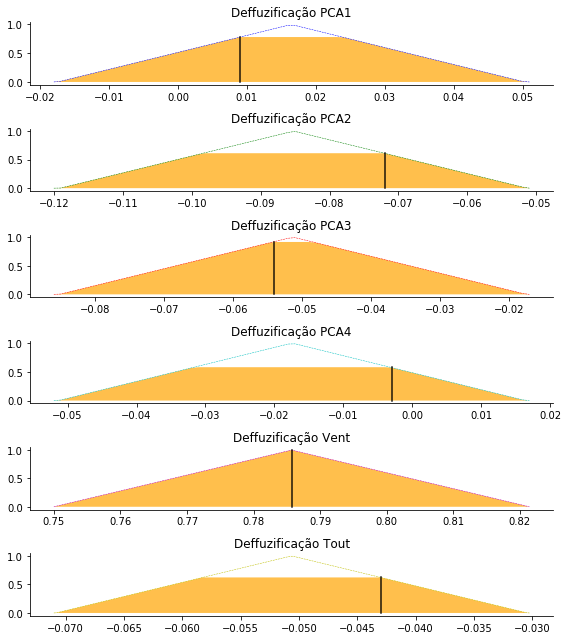

In [ ]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=6, figsize=(8, 9))

ax0.plot(x_axis1, y_axis1, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_axis1, defuzz_funn1, facecolor='Orange', alpha=0.7)
ax0.plot([locc1, locc1], [0, pc1v], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Deffuzificação PCA1')

ax1.plot(x_axis2, y_axis2, 'g', linewidth=0.5, linestyle='--', )
ax1.fill_between(x_axis2, defuzz_funn2, facecolor='Orange', alpha=0.7)
ax1.plot([locc2, locc2], [0, pc2v], 'k', linewidth=1.5, alpha=0.9)
ax1.set_title('Deffuzificação PCA2')

ax2.plot(x_axis3, y_axis3, 'r', linewidth=0.5, linestyle='--', )
ax2.fill_between(x_axis3, defuzz_funn3, facecolor='Orange', alpha=0.7)
ax2.plot([locc3, locc3], [0, pc3v], 'k', linewidth=1.5, alpha=0.9)
ax2.set_title('Deffuzificação PCA3')

ax3.plot(x_axis4, y_axis4, 'c', linewidth=0.5, linestyle='--', )
ax3.fill_between(x_axis4, defuzz_funn4, facecolor='Orange', alpha=0.7)
ax3.plot([locc4, locc4], [0, pc4v], 'k', linewidth=1.5, alpha=0.9)
ax3.set_title('Deffuzificação PCA4')

ax4.plot(x_axis5, y_axis5, 'm', linewidth=0.5, linestyle='--', )
ax4.fill_between(x_axis5, defuzz_funn5, facecolor='Orange', alpha=0.7)
ax4.plot([locc5, locc5], [0, ventv], 'k', linewidth=1.5, alpha=0.9)
ax4.set_title('Deffuzificação Vent')

ax5.plot(x_axis6, y_axis6, 'y', linewidth=0.5, linestyle='--', )
ax5.fill_between(x_axis6, defuzz_funn6, facecolor='Orange', alpha=0.7)
ax5.plot([locc6, locc6], [0, toutv], 'k', linewidth=1.5, alpha=0.9)
ax5.set_title('Deffuzificação Tout')

# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3, ax4, ax5):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [ ]:
new_rulespd

,PCA1,PCA2,PCA3,PCA4,Vent,Tout
0,comp30,comp27,comp28,comp29,ventnum49,temp47


In [ ]:
plt.plot(dataout.NumVentOn[stp_ini:stp_fim-k].reset_index(drop=True), 'r', label='Dado bruto')
plt.plot(Vent_sim.val[stp_ini:stp_fim-k], 'b--', label='Simulação')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [ ]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
# from sklearn.utils import check_array

# def mean_absolute_percentage_error(y_true, y_pred):
#     y_true, y_pred = check_array(y_true, y_pred)
#     ## Note: does not handle mix 1d representation
#     #if _is_1d(y_true):
#     #    y_true, y_pred = _check_1d_array(y_true, y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Max_E = max_error(dataoutf.TsaidaHT[stp_ini:stp_fim-k],Tout_sim.val[0:end-k])
MSE = mean_squared_error(dataoutf.TsaidaHT[stp_ini:stp_fim-k],Tout_sim.val[0:end-k])
MAPE = mean_absolute_percentage_error(dataoutf.TsaidaHT[stp_ini:stp_fim-k],Tout_sim.val[0:end-k])

print(Max_E)
print(MSE)
print(MAPE)

7.530673548056427
2.0303811750915886
1.9990084172021898


In [ ]:
#dataout.TsaidaHT[stp_ini:stp_fim-k]
Tout_sim.val[0:end-k]

0        25.251883
1        25.251883
2        25.251883
3        25.251883
4        25.251883
5        25.251883
6        25.251883
7        25.251884
8        25.251884
9        25.251884
10       25.251884
11       25.251883
12       25.251883
13       25.251883
14       25.251883
15       25.251883
16       25.251884
17       25.251883
18       25.251884
19       25.251884
20       25.251884
21       25.251885
22       25.251884
23       25.251884
24       25.251883
25       25.251883
26       25.251883
27       25.251883
28       25.251883
29       25.251883
           ...    
21570    58.239601
21571    58.169178
21572    57.858666
21573    57.668455
21574    57.974238
21575    58.345632
21576    59.672833
21577    58.929436
21578    59.820252
21579    59.916731
21580    59.995000
21581    59.853884
21582    58.649663
21583    58.561676
21584    58.163486
21585    58.230852
21586    58.018215
21587    57.735817
21588    57.979579
21589    58.220604
21590    59.575529
21591    59.

In [ ]:
fulltime = len(DataHora)/3600
entrada_on.NumVentOn.hist(bins=25, weights=np.ones(len(entrada_on.NumVentOn)) / 3600, align='mid' )

In [ ]:
saida_on.hist(bins=60, weights=np.ones(len(saida_on)) / 3600)

In [ ]:
saida_on.hist(bins=60)

In [ ]:
entrada_normal.to_csv(r'C:\Users\carlos.araujo\Documents\Mestrado\Python\Dados\entrada_on_normal_14a26_maio.txt', header=['TentHT', 'NumVentOn', 'Tamb'], index=None, sep=' ', mode='a')
saida_normal.to_csv(r'C:\Users\carlos.araujo\Documents\Mestrado\Python\Dados\saida_on_normal_14a26_maio.txt', header=['TsaidaHT'], index=None, sep=' ', mode='a')
cond_normal.to_csv(r'C:\Users\carlos.araujo\Documents\Mestrado\Python\Dados\cond_on_normal_14a26_maio.txt', header=['Status'], index=None, sep=' ', mode='a')
DataHora_normal.to_csv(r'C:\Users\carlos.araujo\Documents\Mestrado\Python\Dados\datahora_on_normal_14a26_maio.txt', header=['DataHora'], index=None, sep=' ', mode='a')
